In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense ,LSTM ,Embedding ,Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

In [113]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [114]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

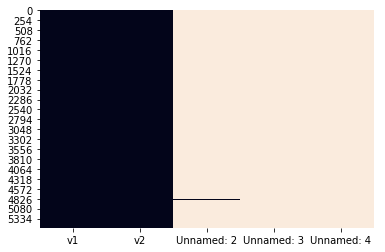

In [115]:
sns.heatmap(df.isnull(),cbar=False) # it contain max null in last three col

In [116]:
df.drop(df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)

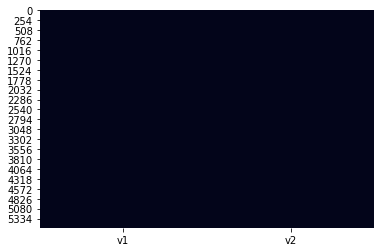

In [117]:
sns.heatmap(df.isnull(),cbar=False) # now data have no null values

In [118]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


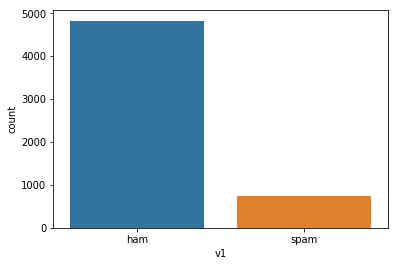

In [119]:
sns.countplot(df['v1'])

# Now time to split dataframe into x and y

In [120]:
x = df['v2']
y = df['v1']

In [121]:
x.shape

(5572,)

In [122]:
y.shape

(5572,)

# Apply Label encoder to convert str format into numeric data

In [123]:
y[:5,]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [124]:
Le = LabelEncoder()
y = Le.fit_transform(y)
y = y.reshape(-1,1)

In [125]:
y_label = pd.DataFrame(y)
y_label.head()

,0
0,0
1,0
2,1
3,0
4,0


# Now Split data into test train 

In [126]:
x_test , x_train , y_test , y_train = train_test_split(x,y,test_size=0.30, random_state=42)

In [127]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [128]:
sequences_matrix.shape[1]


150

In [129]:
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_7 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 501       
Total params: 161,401
Trainable params: 161,401
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 1337 samples, validate on 335 samples
Epoch 1/10
1337/1337 [==============================] - 3s 2ms/sample - loss: 0.6085 - accuracy: 0.8070 - val_loss: 0.3095 - val_accuracy: 0.9015
Epoch 2/10
1337/1337 [==============================] - 2s 1ms/sample - loss: 0.3766 - accuracy: 0.8609 - val_loss: 0.2682 - val_accuracy: 0.9015
Epoch 3/10
1337/1337 [==============================] - 2s 1ms/sample - loss: 0.2715 - accuracy: 0.8624 - val_loss: 0.1551 - val_accuracy: 0.9254
Epoch 4/10
1337/1337 [==============================] - 2s 1ms/sample - loss: 0.1545 - accuracy: 0.9566 - val_loss: 0.0594 - val_accuracy: 0.9910
Epoch 5/10
1337/1337 [==============================] - 2s 1ms/sample - loss: 0.0807 - accuracy: 0.9761 - val_loss: 0.0566 - val_accuracy: 0.9910
Epoch 6/10
1337/1337 [==============================] - 2s 1ms/sample - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0500 - val_accuracy: 0.9881
Epoch 7/10
1337/1337 [==============================] - 3s 2ms/sample - loss:

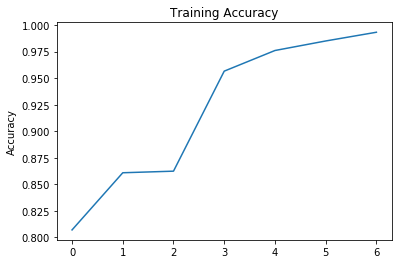

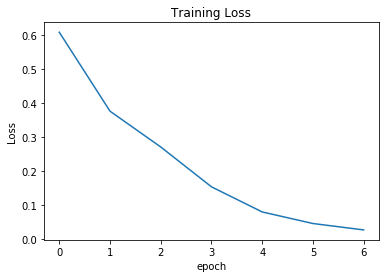

In [138]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()
